# Object Detection using Transfer Learning of CNN Architectures

## Problem Statement
Implement object detection using Transfer Learning of CNN architectures by performing the following steps:

1. **Load a Pre-trained CNN Model**
2. **Freeze Lower Convolutional Layers**
3. **Add a Custom Classifier**
4. **Train Classifier Layers**
5. **Fine-tune Hyperparameters**
6. **Dataset Selection**


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Stage a: Load a pre-trained CNN model trained on a large dataset
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Stage b: Freeze parameters in the model’s lower convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [3]:
# Stage c: Add a custom classifier with several layers of trainable parameters to the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # Assuming 10 classes

In [4]:
# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)
# Stage d: Train classifier layers on training data available for the task
# Compile the model
model.compile(optimizer=Adam(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

c:\Users\Alok\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255)
# Replace 'path_to_train' and 'path_to_validation' with actual paths
train_generator = train_datagen.flow_from_directory('./train',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory('./test',
                                                             target_size=(224, 224),
                                                             batch_size=32,
                                                             class_mode='categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: './train'

In [6]:
# Train the model
history = model.fit(train_generator,
                   epochs=10,
                   validation_data=validation_generator)
# Stage e: Fine-tune hyperparameters and unfreeze more layers as needed
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

NameError: name 'train_generator' is not defined

In [16]:
# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
# Continue training
history_fine = model.fit(train_generator,
epochs=5,
validation_data=validation_generator)
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'\nValidation Accuracy: {accuracy:.4f}')

ValueError: Argument(s) not recognized: {'lr': 0.0001}

NameError: name 'history' is not defined

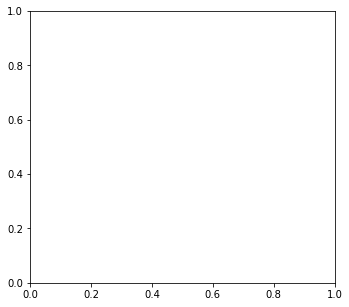

In [17]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12,5))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-tuning Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tuning Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Fine-tuning Loss')
plt.plot(history_fine.history['val_loss'], label='Fine-tuning Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()